<a href="https://colab.research.google.com/github/iamab3/Predicting-Mechanical-Properties-from-Microstructures-using-ML/blob/main/Project_Predicting_Mechanical_Properties_from_Microstructures_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Microstructure-Based Mechanical Property Prediction Pipeline


In [42]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from PIL import Image

In [43]:
# Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

Importing, Reading and Displaying Images

In [44]:
# Extracting images from the compressed zip file
from zipfile import ZipFile
dataset = '/content/ms-images.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [45]:
ms_file = os.listdir('/content/ms-images')
print(ms_file[0:5])
print(ms_file[-5:])

['1.png', '2.png', '10.png', '4.png', '6.png']
['12.png', '8.png', '3.png', '11.png', '5.png']


In [46]:
print('Number of training images', len(ms_file))

Number of training images 12


In [47]:
# Reading the excel containing filenames, and the two labels corresponding to toughness and hardness
label_file_path = '/content/Microstructures-and-Labels.xlsx'
df = pd.read_excel(label_file_path)

# Display the first few rows
print(df.head())

# Directory containing images
image_dir = '/content/ms-images'

labels = []

# Now you can iterate through the DataFrame to link images and labels
for _, row in df.iterrows():
    img_name = row['File_name']
    Toughness = row['Toughness']
    Hardness = row['Hardness']
    labels.append((Toughness, Hardness))

    # Construct the full image path
    img_path = os.path.join(image_dir, str(img_name))

    # Here you would load the image and use the labels for your ML model
    # Example: load_and_process_image(img_path, label_1, label_2)
    print(f"Loading image: {img_path} with labels: {Toughness}, {Hardness}")

  File_name  Toughness  Hardness
0     1.png       9.43     55.75
1     2.png      11.18     58.75
2     3.png      12.33     52.47
3     4.png       9.16     59.08
4     5.png       5.80     64.00
Loading image: /content/ms-images/1.png with labels: 9.43, 55.75
Loading image: /content/ms-images/2.png with labels: 11.18, 58.75
Loading image: /content/ms-images/3.png with labels: 12.33, 52.47
Loading image: /content/ms-images/4.png with labels: 9.16, 59.08
Loading image: /content/ms-images/5.png with labels: 5.8, 64.0
Loading image: /content/ms-images/6.png with labels: 7.3, 65.0
Loading image: /content/ms-images/7.png with labels: 20.4, 52.0
Loading image: /content/ms-images/8.png with labels: 24.34, 54.0
Loading image: /content/ms-images/9.png with labels: 23.66, 58.0
Loading image: /content/ms-images/10.png with labels: 13.09, 53.0
Loading image: /content/ms-images/11.png with labels: 19.59, 52.0
Loading image: /content/ms-images/12.png with labels: 12.51, 54.0


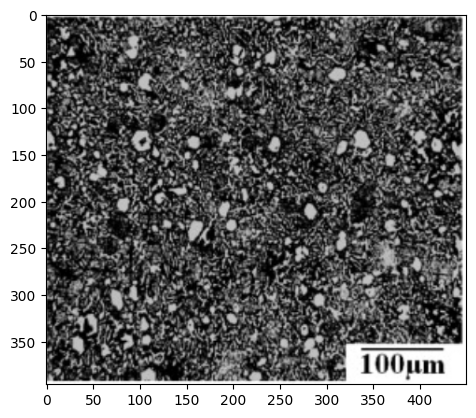

In [48]:
# Displaying the training image
img = mpimg.imread('/content/ms-images/1.png')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [49]:
# Resizing the images and converting it to numpy arrays

# Convert images to numpy arrays
image_dir = '/content/ms-images'

ms_images = []

for img_file in sorted(os.listdir(image_dir)):
  img_path = os.path.join(image_dir, str(img_file))
  image = Image.open(img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  ms_images.append(image)


In [50]:
# Converting the list to numpy arrays
X = np.array(ms_images, dtype='float32')
print("Number of images:", len(ms_images))  # should be 12
# Y = np.array(labels)

# After df is read and labels list is built
labels_array = np.array(labels, dtype='float32')  # shape (12, 2)

# Optionally normalize labels
from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler()
Y = y_scaler.fit_transform(labels_array)  # scaled toughness, hardness

Number of images: 12


Splitting the data in to train and test data

In [51]:
# Splitting data in to training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(12, 128, 128, 3) (9, 128, 128, 3) (3, 128, 128, 3)


In [53]:
# Scaling the data | Neural NetModel performs better
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [54]:
X_train[0]

array([[[ 73.,  73.,  73.],
        [ 82.,  82.,  82.],
        [137., 137., 137.],
        ...,
        [102., 102., 102.],
        [158., 158., 158.],
        [ 85.,  85.,  85.]],

       [[126., 126., 126.],
        [ 96.,  96.,  96.],
        [118., 118., 118.],
        ...,
        [ 40.,  40.,  40.],
        [ 99.,  99.,  99.],
        [138., 138., 138.]],

       [[ 96.,  96.,  96.],
        [ 48.,  48.,  48.],
        [112., 112., 112.],
        ...,
        [ 43.,  43.,  43.],
        [ 67.,  67.,  67.],
        [155., 155., 155.]],

       ...,

       [[ 79.,  79.,  79.],
        [ 98.,  98.,  98.],
        [109., 109., 109.],
        ...,
        [131., 131., 131.],
        [ 78.,  78.,  78.],
        [ 57.,  57.,  57.]],

       [[107., 107., 107.],
        [157., 157., 157.],
        [153., 153., 153.],
        ...,
        [170., 170., 170.],
        [126., 126., 126.],
        [ 61.,  61.,  61.]],

       [[141., 141., 141.],
        [159., 159., 159.],
        [154., 1

Building the CNN Model

In [55]:
# Creating the model
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='linear')) # sigmoid for binary classfication, softmax for multi class classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss='mse',
              metrics=['mae'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │       115,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,618 (455.54 KB)

 Trainable params: 116,618 (455.54 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Training the neural network

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6
)

history = model.fit(
    X_train_scaled, Y_train,
    validation_split=0.3,
    epochs=200,
    batch_size=2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - loss: 0.6698 - mae: 0.7125 - val_loss: 0.6936 - val_mae: 0.7551 - learning_rate: 1.0000e-04
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7315 - mae: 0.7164 - val_loss: 0.6890 - val_mae: 0.7570 - learning_rate: 1.0000e-04
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6224 - mae: 0.6955 - val_loss: 0.7870 - val_mae: 0.7853 - learning_rate: 1.0000e-04
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4993 - mae: 0.6380 - val_loss: 0.8490 - val_mae: 0.7997 - learning_rate: 1.0000e-04
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8106 - mae: 0.7854 - val_loss: 0.8515 - val_mae: 0.8009 - learning_rate: 1.0000e-04
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5409 - mae: 0.6716 - val_loss: 0.8553 - val_mae: 0.8028 - learning_rate: 1.0000e-04
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7665 - mae: 0.7514 - val_loss: 0.8586 - val_mae: 0.8045 - learning_rate: 1.

Model Evaluation

In [58]:
test_loss, test_mae = model.evaluate(X_test_scaled, Y_test, verbose=0)
print('Test MSE =', test_loss)
print('Test MAE =', test_mae)

Test MSE = 2.024488687515259
Test MAE = 1.326638102531433


In [59]:
# Invert scaling for Interpretation
Y_test_true = y_scaler.inverse_transform(Y_test)
Y_test_pred_scaled = model.predict(X_test_scaled)
Y_test_pred = y_scaler.inverse_transform(Y_test_pred_scaled)

# Compute MAE in original units manually if you want
mae_per_property = np.mean(np.abs(Y_test_true - Y_test_pred), axis=0)
print("MAE Toughness:", mae_per_property[0])
print("MAE Hardness:", mae_per_property[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
MAE Toughness: 7.06298
MAE Hardness: 6.446405


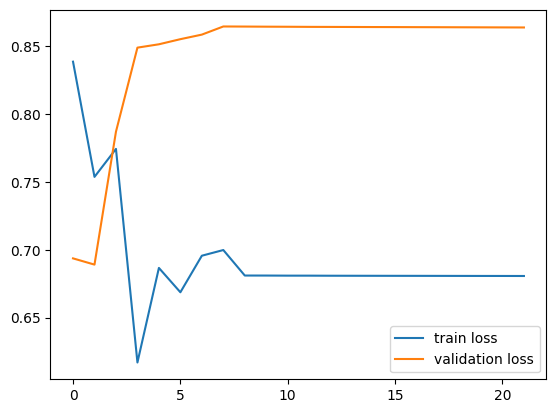

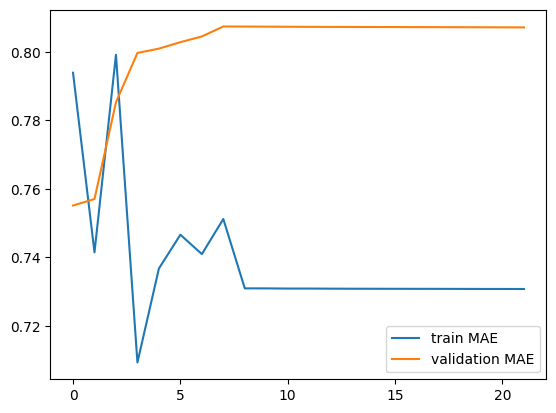

In [60]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['mae'], label='train MAE')
plt.plot(h.history['val_mae'], label='validation MAE')
plt.legend()
plt.show()

Building the Predictive System

In [61]:
def predict_properties(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (128, 128))
    img_scaled = img_resized / 255.0
    img_reshaped = np.expand_dims(img_scaled, axis=0)

    pred_scaled = model.predict(img_reshaped)
    pred = y_scaler.inverse_transform(pred_scaled)[0]  # [toughness, hardness]

    print(f"Predicted toughness: {pred[0]:.2f}")
    print(f"Predicted hardness: {pred[1]:.2f}")

input_image_path = input('Path of the image to be predicted: ')
pred = predict_properties(input_image_path)

Path of the image to be predicted: /content/Test Image.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Predicted toughness: 16.87
Predicted hardness: 56.81
